<a href="https://colab.research.google.com/github/avdesmu/Netfix-Analysis-and-Recommendation-System.ipynb/blob/main/Netfix_Analysis_and_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Netflix


1.   Country wise analysis of content(TV shows and movies).
2.   Monthly analysis of content released in particular month
3. Yearly Analysis
4. Movie Rating analysis
5. Content Genre Analysis
6. Impact of Corona on the content all over the world
7. Content Based Recommendation System.






![im-215085](https://drive.google.com/uc?export=view&id=1x9rTYFd91Jbgn2Hl0YXPQ7CPBMmLUObt)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
plt.style.use('fivethirtyeight')



In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
#number of missing values
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
# Drop the nas in country as we are interested in countries and type
count_df = df.dropna(subset = ['country'])

In [7]:
count_df.isnull().sum()

show_id            0
type               0
title              0
director        2087
cast             622
country            0
date_added         9
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

## Country wise analysis of Netflix content(TV shows and Movies)

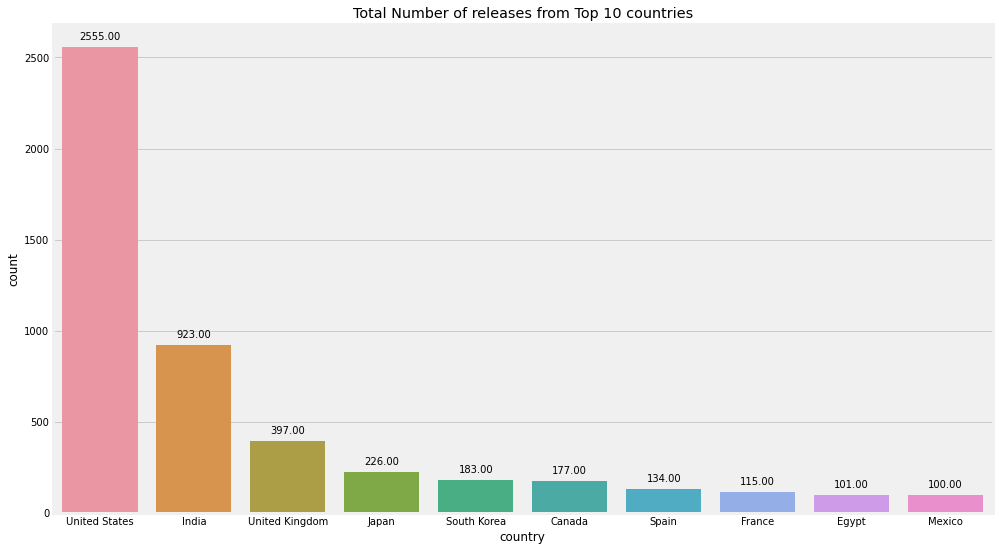

____________________________________________________________________________________________________________________________________________________________________________________________


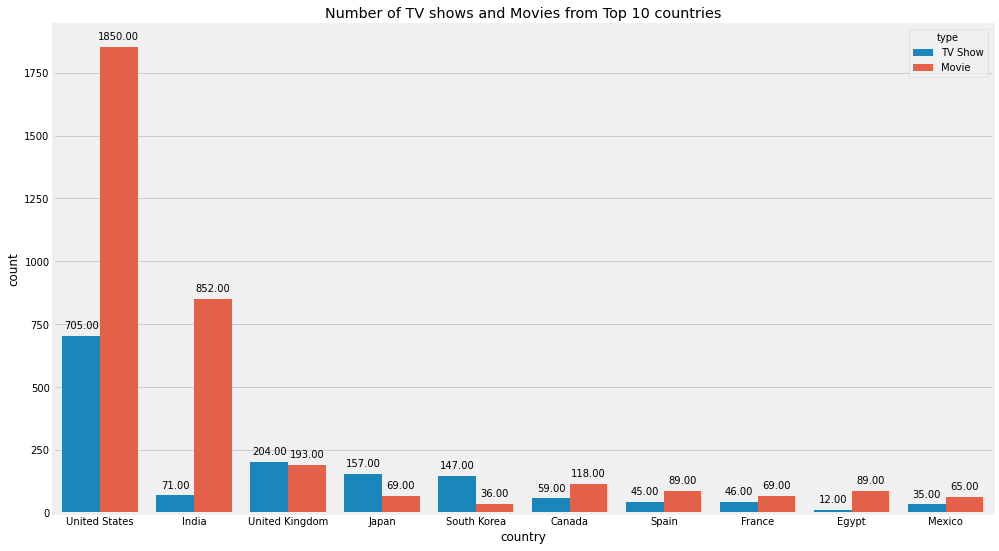

In [8]:
#Plot of Total Number of releases from Top 10 countries
plt.figure(figsize=(15,9))
count_plot = sns.countplot(x="country",data= count_df,order = count_df['country'].value_counts().index[0:10])
for p in count_plot.patches:
  count_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Total Number of releases from Top 10 countries')
plt.show()
print('____________________________________________________________________________________________________________________________________________________________________________________________')
#Plot of Tv shows and Televison show from the Top 10 countries
plt.figure(figsize=(15,9))
type_plot= sns.countplot(x="country",data= count_df,hue= 'type' ,order = count_df['country'].value_counts().index[0:10])
for p in type_plot.patches:
  type_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Number of TV shows and Movies from Top 10 countries')
plt.show()

1] USA have the highest number of releases in both the movies as well as TV Show categories

2] Indian bollywood releases more movies than series on Netflix. Number of TV shows from India is less as compare to US, United Kingdom, Japan, South Korea

3] South Korean TV shows is popular across the world and we can observe that from the above plot that they release more TV shows than movies.





## Montly content releases on Netflix

In [9]:
#netflix_date is the subset where we are focused on date_added column
netflix_date = df.dropna(subset= ['date_added'])
#Split the data in date, month and year
netflix_date[["Date","Month","Year"]] = netflix_date.date_added.str.split("-", expand= True)
# getting the unique values in Month column
list(set(netflix_date['Month']))
#Result : Values in Month column ['Oct', 'Mar', 'Nov', 'May', 'Feb', 'Sep', 'Jun', 'Jan', 'Apr', None, 'Jul', 'Dec', 'Aug']
## There is extra value named 'None', which represents the values where we dont know the month
# We Have to remove the 'None' from month column
netflix_date=netflix_date[netflix_date.Month != 'None']

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



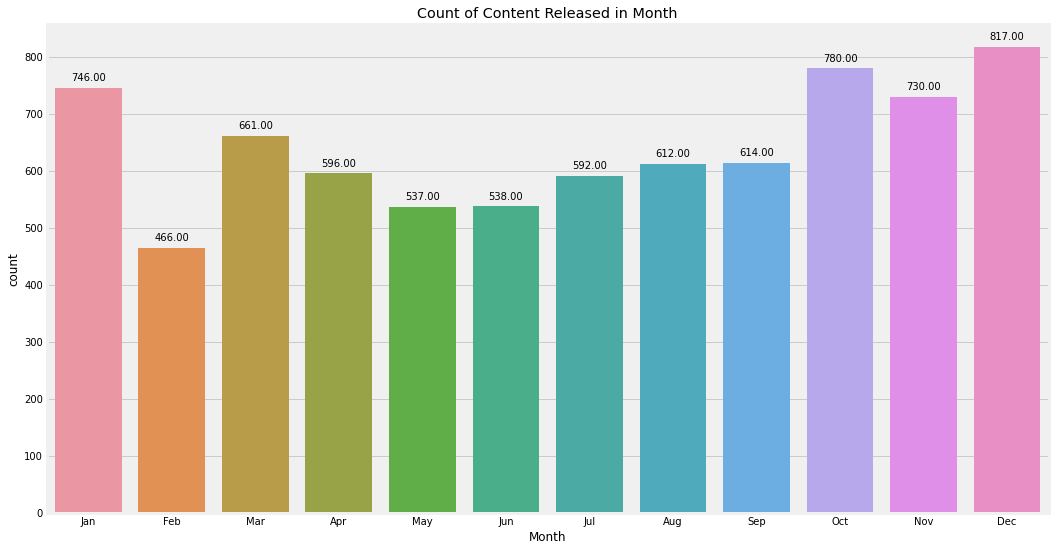

In [10]:
# Plot the best month for releasing the movies or TV shows
plt.figure(figsize=(16,9))
date_plot= sns.countplot(x="Month",data= netflix_date,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] )
for p in date_plot.patches:
  date_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Count of Content Released in Month')
plt.show()



Most of the directors tries to release the movies in Holidays (Dec/Jan)

# Yearly Analysis

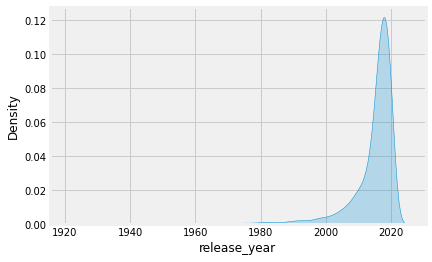

In [11]:
# There are no NA's in release_year 
sns.kdeplot(data= df['release_year'], shade=True)


Most of the content present on netflix present on netfix was released between years 2000 to 2021.

# Movie Rating Analysis

Description of the Rating on Netflix.
https://help.netflix.com/en/node/2064

**Kids**

TV-Y- Designed to be appropriate for all children

TV-Y7- Suitable for ages 7 and up

G - Suitable for General Audiences

TV-G- Suitable for General Audiences

PG- Parental Guidance suggested

TV-PG- Parental Guidance suggested


**Teens**

PG-13- Parents strongly cautioned. May be Inappropriate for ages 12 and under.

TV-14- Parents strongly cautioned. May not be suitable for ages 14 and under.

**Adults**

R- Restricted. May be inappropriate for ages 17 and under.

TV-MA- For Mature Audiences. May not be suitable for ages 17 and under.

NC-17- Inappropriate for ages 17 and under

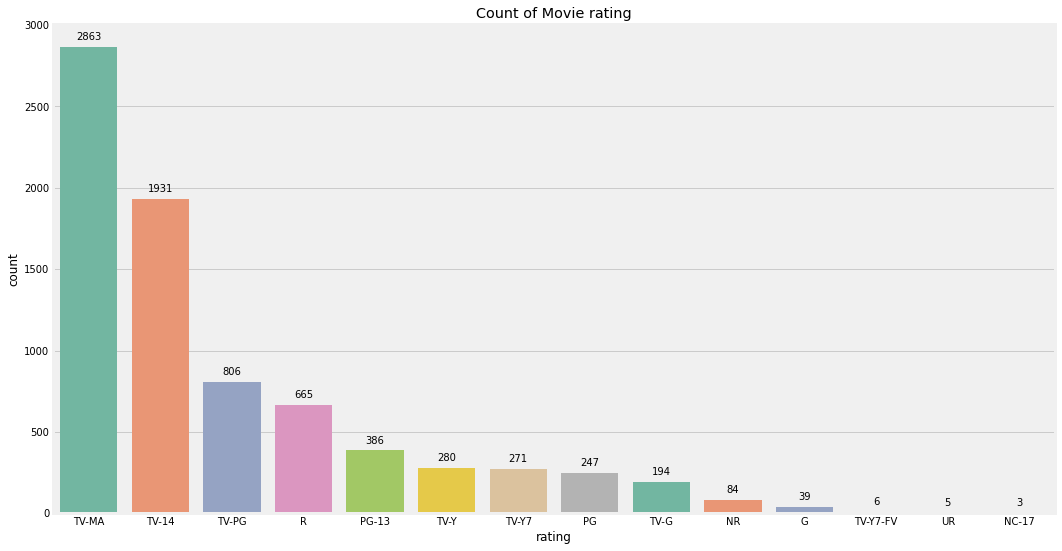

In [12]:
netflix_rating  =  df.dropna(subset= ['rating']) # Removed NA's from rating coloumn as we are interested in ratings.
plt.figure(figsize=(16,9))
ax = sns.countplot(x="rating", data=netflix_rating,
    palette="Set2", order=netflix_rating['rating'].value_counts().index)
for p in ax.patches:
  ax.annotate(format(p.get_height(), ''), (p. get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Count of Movie rating")
plt.show()

Netflix is most focus on the customers age above 17 that is the reason TV-MA rating type content is more present on Netflix than any other rating. 


## Content Genre analysis

## Word Cloud of Genre (Netflix content)

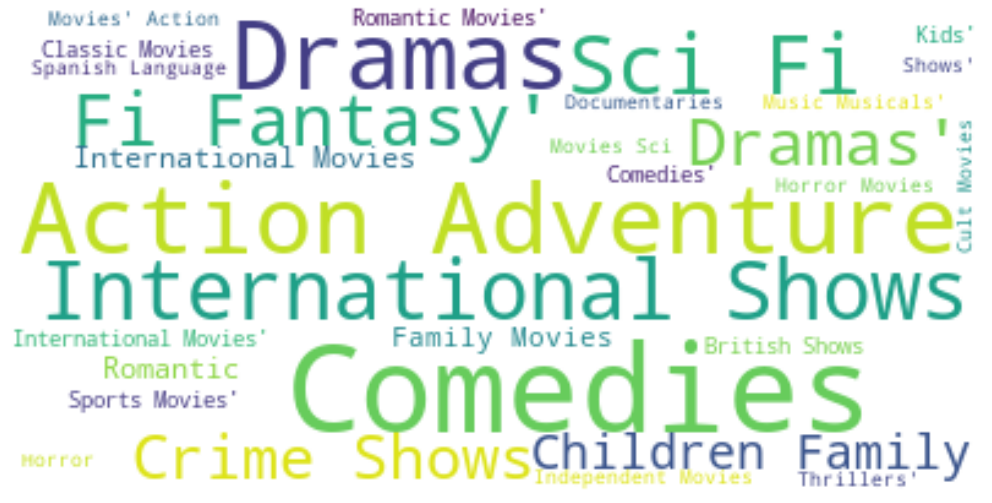

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=(16,9))
Genre = list(set(df['listed_in']))
wordcloud = WordCloud(max_font_size=50, max_words= 30,stopwords= ['TV'] ,background_color="white").generate(str(Genre))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

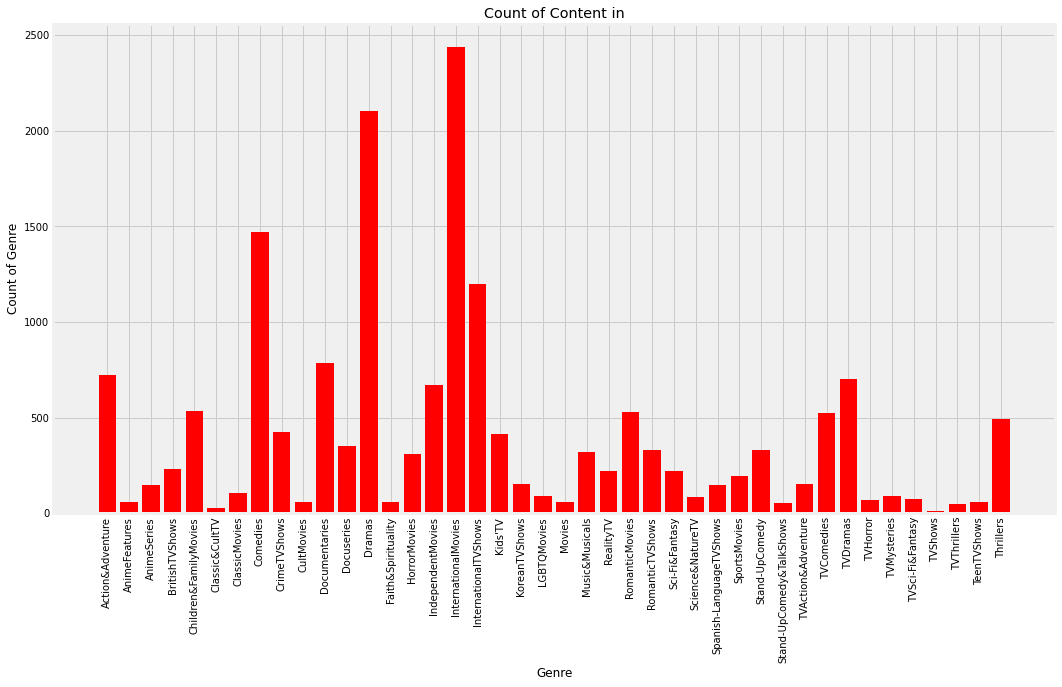

In [14]:
genres=list(df['listed_in'])

Genre=[]

for i in genres:
  i=list(i.split(','))
  for j in i:
    Genre.append(j.replace(' ',""))
Count_genre=Counter(Genre)

Count_genre={k: v for k, v in sorted(Count_genre.items(), key=lambda item: item[1], reverse= True)}
lists = sorted(Count_genre.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(16,9))
plt.bar(x,y,color='Red')
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count of Genre")
plt.title("Count of Content in")
plt.show()

On Netflix, International Genre have the highest number of movies and TV shows, represents the kind of diversity Netflix tries to maintain for diverse customer base across the World.


## Impact on content because of corona

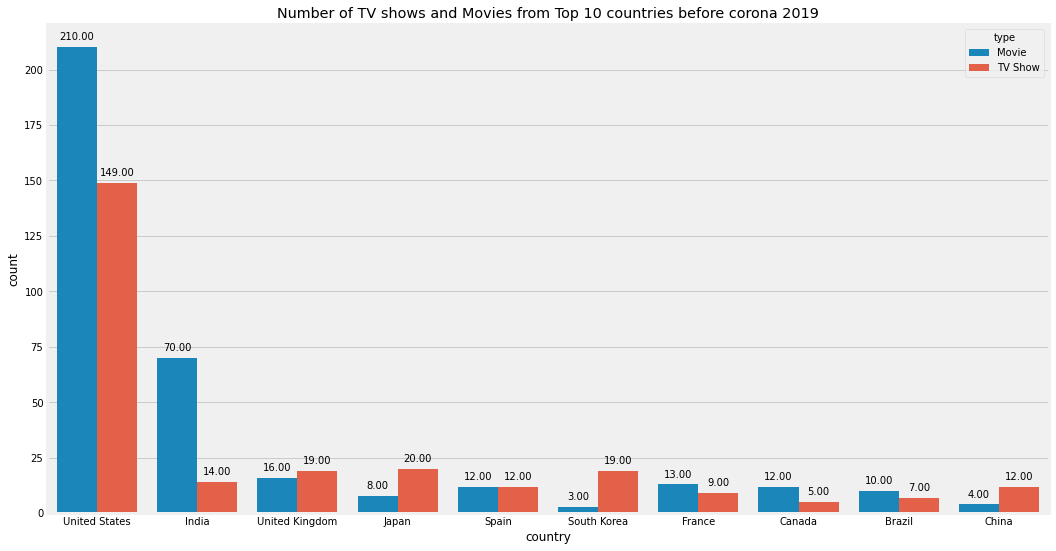

____________________________________________________________________________________________________________________________________________________________________________________________


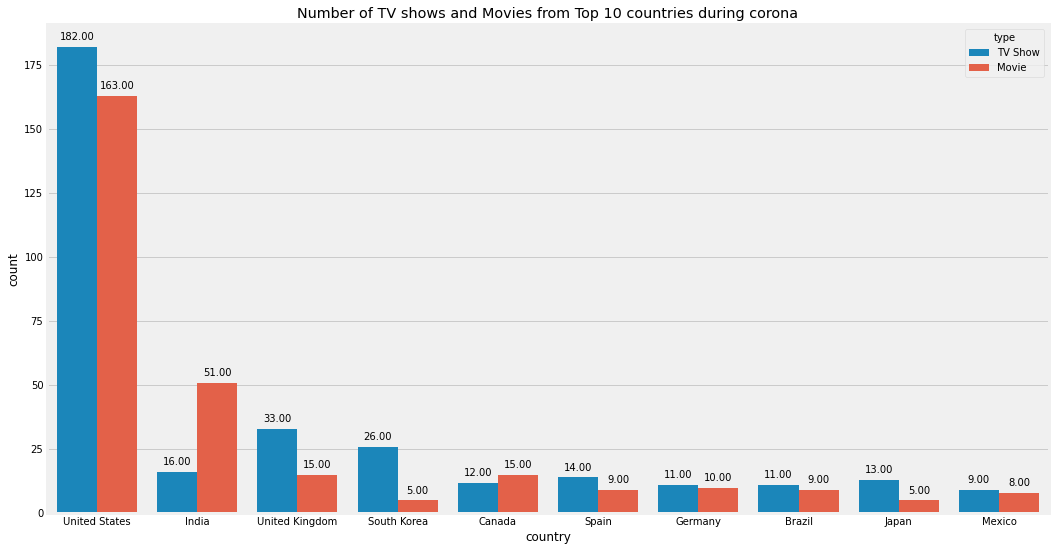

In [15]:
relases_2019 = df[df.release_year == 2019]
plt.figure(figsize=(16,9))
type_plot= sns.countplot(x="country",data= relases_2019,hue= 'type' ,order = relases_2019['country'].value_counts().index[0:10])
for p in type_plot.patches:
  type_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Number of TV shows and Movies from Top 10 countries before corona 2019')
plt.show()
print('____________________________________________________________________________________________________________________________________________________________________________________________')

#_______________________________________________________________________________________________________
relases_2020_21 = df[(df.release_year == 2021) | (df.release_year == 2020)]
plt.figure(figsize=(16,9))
type_plot= sns.countplot(x="country",data= relases_2020_21,hue= 'type' ,order = relases_2020_21['country'].value_counts().index[0:10])
for p in type_plot.patches:
  type_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Number of TV shows and Movies from Top 10 countries during corona')
plt.show()




The Content from France and China is decreased as  these countries are not on top 10 content list during corona but they were during 2019

Because at that time France and China had a bad impact because of Corona.

In [16]:
count_2020_21 = relases_2020_21['country'].value_counts().sort_values(ascending= False)
print('The Number of countries released new content on Netflix during corona: ',len(count_2020_21))

count_2019 = relases_2019['country'].value_counts().sort_values(ascending= False)
print('The Number of countries released new content on Netflix year before corona: ',len(count_2019))



The Number of countries released new content on Netflix during corona:  102
The Number of countries released new content on Netflix year before corona:  126


## Content Based recommendation System for Netflix movies

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')#removing stopwords
df['description'] = df['description'].fillna('')#Replace NaN with an empty string
tfidf_matrix = tfidf.fit_transform(df['description'])# fitting and transforming the data
tfidf_matrix.shape # The shape of tfidf_matrix

(7787, 17905)

In [18]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
# Compute the cosine similarity matrix
#cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [19]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [20]:
def get_recommendations(title, cosine_sim=cosine_sim):
  idx = indices[title]
  # Get the pairwsie similarity scores of all movies with that movie
  sim_scores = list(enumerate(cosine_sim[idx]))
  # Sort the movies based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  # Get the scores of the 10 most similar movies
  sim_scores = sim_scores[1:11]
  # Get the movie indices
  movie_indices = [i[0] for i in sim_scores]
  # Return the top 10 most similar movies
  return df['title'].iloc[movie_indices]


In [21]:
print(get_recommendations("Friends"))

3904         Manhattan Romance
1025           BoJack Horseman
2015                  Episodes
5860                 Studio 54
1577                Dad's Army
7169         Trailer Park Boys
5629      Single Ladies Senior
4034                    Menahi
6549    The Larva Island Movie
7482                Warehoused
Name: title, dtype: object


We can see in the above recommendation that the Friends have recommendation like Episodes (both have same actor 'Matt Leblonc', Dad's army (both Friends and Dad's army are Sitcoms), Trailer Park Boys (Both are the sitcoms from 1990's), etc. 